In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df2 = pd.read_csv("heart_2022_no_nans.csv")
df3 = pd.read_csv("dataset_combinado_columnas_coincidentes.csv")

In [3]:
df.shape

(319795, 18)

In [4]:
# Reducir el DataFrame df a 319,795 filas aleatorias
df = df.sample(n=246022, random_state=42).reset_index(drop=True)

# Verificar nueva forma
print("Nuevo tamaño del DataFrame:", df.shape)


Nuevo tamaño del DataFrame: (246022, 18)


In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.head(15)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,27.63,Yes,No,No,0.0,25.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
1,No,21.95,No,No,No,0.0,20.0,No,Female,30-34,White,No,Yes,Excellent,6.0,No,No,Yes
2,No,31.32,Yes,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,6.0,Yes,No,No
3,No,40.35,No,No,No,30.0,0.0,No,Female,65-69,White,No,No,Good,8.0,No,No,No
4,No,35.61,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,No,No,Fair,4.0,Yes,No,Yes
5,Yes,24.63,Yes,No,No,0.0,0.0,No,Female,80 or older,White,Yes,Yes,Very good,8.0,No,No,No
6,No,41.73,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Very good,7.0,No,No,No
7,No,16.30,No,No,No,2.0,0.0,No,Female,25-29,Hispanic,No,No,Excellent,8.0,No,No,No
8,No,21.52,Yes,No,No,30.0,0.0,No,Male,65-69,White,No,No,Good,8.0,No,No,No
9,No,29.53,Yes,No,No,28.0,30.0,Yes,Male,45-49,Black,No,Yes,Fair,5.0,Yes,No,No


In [7]:
df2.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
df2.shape

(246022, 40)

In [9]:
df2.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [10]:
df3.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,GenHealth,HeartDisease,KidneyDisease,PhysicalActivity,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke,Año
0,55-59,No,Yes,16.60,Yes,Very good,No,No,Yes,White,Female,Yes,5.0,Yes,No,2020
1,80 or older,No,No,20.34,No,Very good,No,No,Yes,White,Female,No,7.0,No,Yes,2020
2,65-69,No,Yes,26.58,Yes,Fair,No,No,Yes,White,Male,No,8.0,Yes,No,2020
3,75-79,No,No,24.21,No,Good,No,No,No,White,Female,Yes,6.0,No,No,2020
4,40-44,No,No,23.71,No,Very good,No,No,Yes,White,Female,No,8.0,No,No,2020


In [11]:
df3.shape

(565817, 16)

In [12]:
df3.isnull().sum()

AgeCategory         0
AlcoholDrinking     0
Asthma              0
BMI                 0
Diabetic            0
GenHealth           0
HeartDisease        0
KidneyDisease       0
PhysicalActivity    0
Race                0
Sex                 0
SkinCancer          0
SleepTime           0
Smoking             0
Stroke              0
Año                 0
dtype: int64

Análisis general por separado de los dos dataset

In [13]:
#valores standarizados
df2['GeneralHealth'] = df2['GeneralHealth'].str.lower()
df2['HadHeartAttack'] = df2['HadHeartAttack'].str.lower()

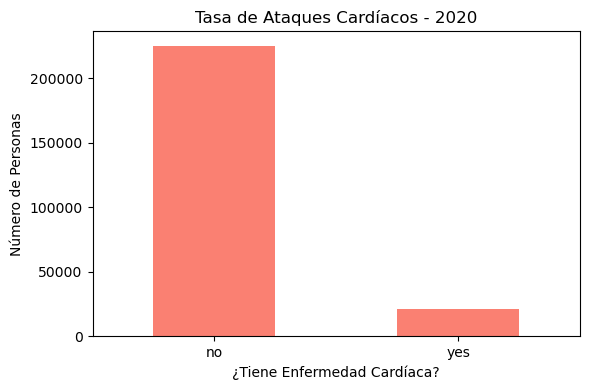

In [14]:
#Tasa de ataques cardíacos

df['HeartDisease'] = df['HeartDisease'].str.lower()

plt.figure(figsize=(6, 4))
df['HeartDisease'].value_counts().plot(kind='bar', color='salmon')
plt.title('Tasa de Ataques Cardíacos - 2020')
plt.ylabel('Número de Personas')
plt.xlabel('¿Tiene Enfermedad Cardíaca?')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


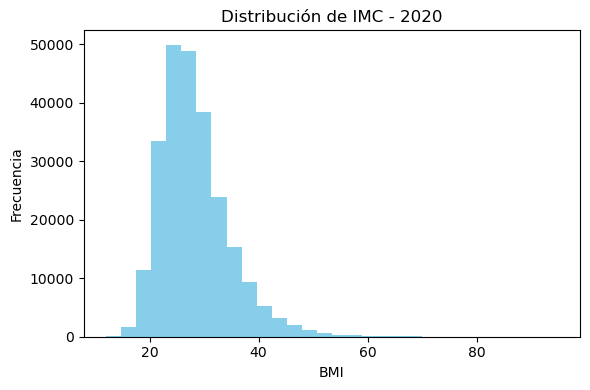

In [15]:
#IMC
plt.figure(figsize=(6, 4))
df['BMI'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribución de IMC - 2020')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


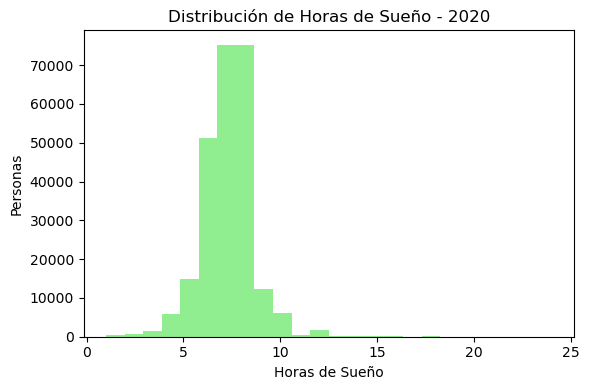

In [16]:
#Horas de sueño
plt.figure(figsize=(6, 4))
df['SleepTime'].plot(kind='hist', bins=24, color='lightgreen')
plt.title('Distribución de Horas de Sueño - 2020')
plt.xlabel('Horas de Sueño')
plt.ylabel('Personas')
plt.tight_layout()
plt.show()

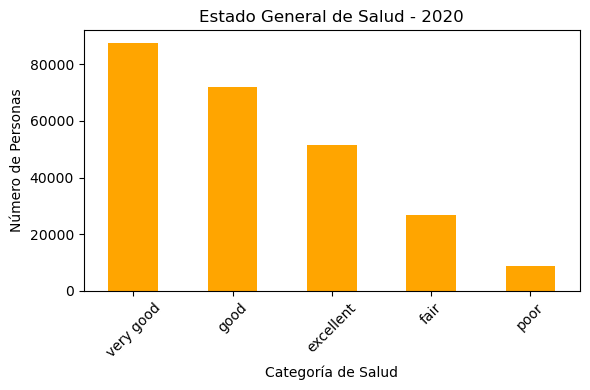

In [17]:
#Salud general
df['GenHealth'] = df['GenHealth'].str.lower()

plt.figure(figsize=(6, 4))
df['GenHealth'].value_counts().plot(kind='bar', color='orange')
plt.title('Estado General de Salud - 2020')
plt.ylabel('Número de Personas')
plt.xlabel('Categoría de Salud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [18]:
df2['HadHeartAttack'] = df2['HadHeartAttack'].str.lower()
df2['GeneralHealth'] = df2['GeneralHealth'].str.lower()

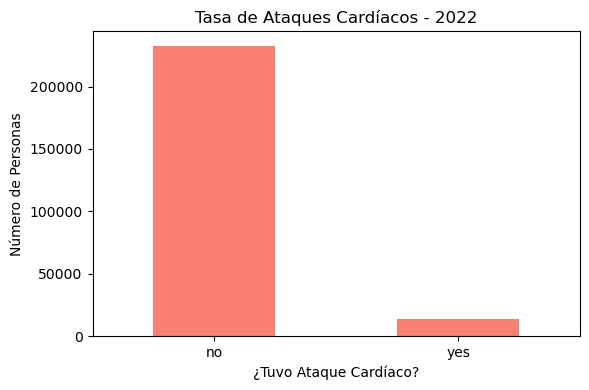

In [19]:
#Ataques cardiacos
plt.figure(figsize=(6, 4))
df2['HadHeartAttack'].value_counts().plot(kind='bar', color='salmon')
plt.title('Tasa de Ataques Cardíacos - 2022')
plt.ylabel('Número de Personas')
plt.xlabel('¿Tuvo Ataque Cardíaco?')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

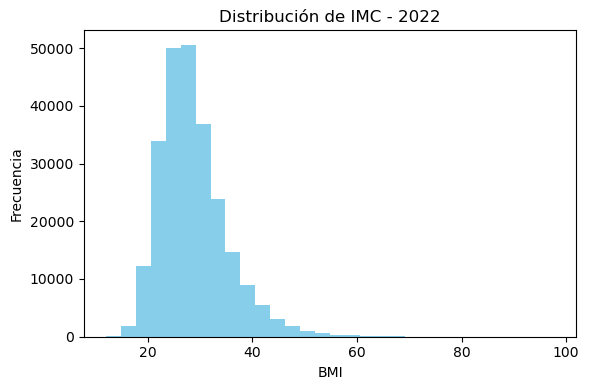

In [20]:
#IMC
plt.figure(figsize=(6, 4))
df2['BMI'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribución de IMC - 2022')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

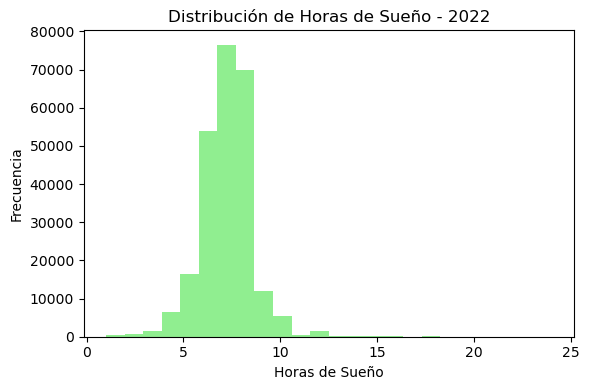

In [21]:
#Sueño
plt.figure(figsize=(6, 4))
df2['SleepHours'].plot(kind='hist', bins=24, color='lightgreen')
plt.title('Distribución de Horas de Sueño - 2022')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

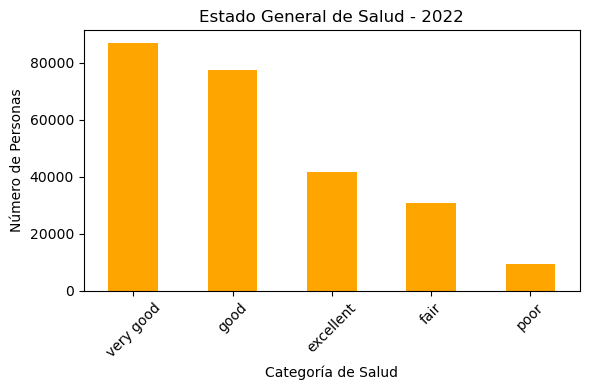

In [22]:
# Estado General de Salud
plt.figure(figsize=(6, 4))
df2['GeneralHealth'].value_counts().plot(kind='bar', color='orange')
plt.title('Estado General de Salud - 2022')
plt.ylabel('Número de Personas')
plt.xlabel('Categoría de Salud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análisis de los datos unificados

In [23]:
df4 = df3.copy()

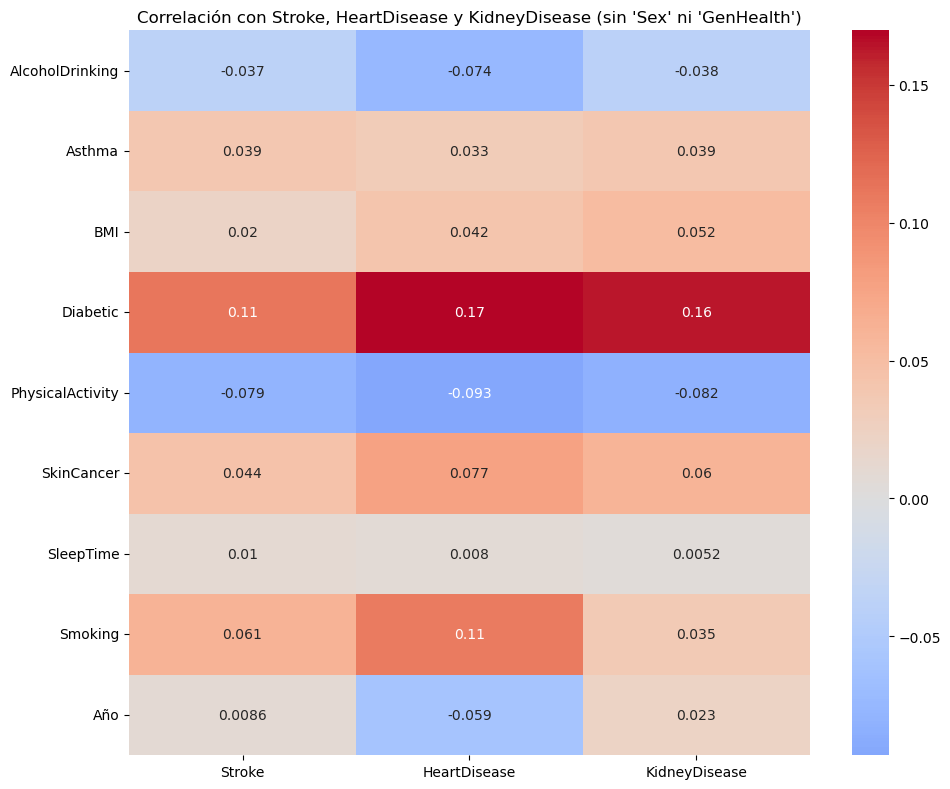

In [24]:

# Variables objetivo
targets = ['Stroke', 'HeartDisease', 'KidneyDisease']

# Convertir columnas yes/no a 1/0
yes_no_columns = [
    'AlcoholDrinking', 'Asthma', 'Diabetic', 'HeartDisease',
    'KidneyDisease', 'PhysicalActivity', 'SkinCancer', 'Smoking', 'Stroke'
]
for col in yes_no_columns:
    if col in df4.columns:
        df4[col] = df4[col].map({'Yes': 1, 'No': 0})

# Quitar 'Sex' y 'GenHealth' si están
df4 = df4.drop(columns=[col for col in ['Sex', 'GenHealth'] if col in df4.columns])

# Calcular matriz de correlación
correlation_matrix = df4.corr(numeric_only=True)

# Extraer correlaciones con las variables objetivo
correlation_targets = correlation_matrix[targets].drop(index=targets, errors='ignore')

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_targets, annot=True, cmap="coolwarm", center=0)
plt.title("Correlación con Stroke, HeartDisease y KidneyDisease (sin 'Sex' ni 'GenHealth')")
plt.tight_layout()
plt.show()

Preparamos dataset para tableau

In [25]:

# Normalizar valores categóricos
cols_to_lower = ['Sex', 'GenHealth', 'AgeCategory']
for col in cols_to_lower:
    if col in df3.columns:
        df3[col] = df3[col].astype(str).str.lower()

#Columnas clave
columnas_utiles = [
    'Año', 'AgeCategory', 'Sex', 'BMI', 'SleepTime',
    'GenHealth', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity',
    'Diabetic', 'Asthma', 'SkinCancer', 'KidneyDisease',
    'Stroke', 'HeartDisease'
]

# Crear nueva columna con agrupación personalizada
def agrupar_edad(categoria):
    if categoria in ['18-24', '25-29', 'age 18 to 24', 'age 25 to 29']:
        return '18-29'
    elif categoria in ['30-34', '35-39', 'age 30 to 34', 'age 35 to 39']:
        return '30-39'
    elif categoria in ['40-44', '45-49', 'age 40 to 44', 'age 45 to 49']:
        return '40-49'
    elif categoria in ['50-54', '55-59', 'age 50 to 54', 'age 55 to 59']:
        return '50-59'
    elif categoria in ['60-64', '65-69', 'age 60 to 64', 'age 65 to 69']:
        return '60-69'
    elif categoria in ['70-74', '75-79', '80 or older', 'age 70 to 74', 'age 75 to 79', 'age 80 or older']:
        return '70+'
    else:
        return 'Desconocido'

# Aplicar la función
df3['AgeCategory'] = df3['AgeCategory'].apply(agrupar_edad)

#Versión limpia
df_tableau = df3[columnas_utiles]

df_tableau.to_csv("dataset_tableau_preparado.csv", index=False)


In [26]:
df3.dtypes

AgeCategory          object
AlcoholDrinking      object
Asthma               object
BMI                 float64
Diabetic             object
GenHealth            object
HeartDisease         object
KidneyDisease        object
PhysicalActivity     object
Race                 object
Sex                  object
SkinCancer           object
SleepTime           float64
Smoking              object
Stroke               object
Año                   int64
dtype: object

In [27]:
df3.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,GenHealth,HeartDisease,KidneyDisease,PhysicalActivity,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke,Año
0,50-59,No,Yes,16.60,Yes,very good,No,No,Yes,White,female,Yes,5.0,Yes,No,2020
1,70+,No,No,20.34,No,very good,No,No,Yes,White,female,No,7.0,No,Yes,2020
2,60-69,No,Yes,26.58,Yes,fair,No,No,Yes,White,male,No,8.0,Yes,No,2020
3,70+,No,No,24.21,No,good,No,No,No,White,female,Yes,6.0,No,No,2020
4,40-49,No,No,23.71,No,very good,No,No,Yes,White,female,No,8.0,No,No,2020


In [28]:
# 🔁 Cambia 'stroke' por 'heartdisease' o 'kidneydisease' según el análisis
target = "Stroke"

X = df3.drop(columns=["Stroke", "HeartDisease", "KidneyDisease"])  # Excluimos todos los targets
y = df3[target]


# 🔤 Convertimos variables categóricas a numéricas (OneHot o Label Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encoding

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


p:\ironhack\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "p:\ironhack\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "p:\ironhack\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "p:\ironhack\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "p:\ironhack\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^

In [ ]:
#Pasamos los targets a formato binario
df3['Stroke'] = df3['Stroke'].map({'Yes': 1, 'No': 0}) if df3['Stroke'].dtype == 'object' else df3['Stroke']
df3['HeartDisease'] = df3['HeartDisease'].map({'Yes': 1, 'No': 0}) if df3['HeartDisease'].dtype == 'object' else df3['HeartDisease']
df3['KidneyDisease'] = df3['KidneyDisease'].map({'Yes': 1, 'No': 0}) if df3['KidneyDisease'].dtype == 'object' else df3['KidneyDisease']

#Targets
targets = ['Stroke', 'HeartDisease', 'KidneyDisease']

#Modelos de ML
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

#Bucle para cada enfermedad
for target in targets:
    print(f"\n==================== 🧠 MODELOS PARA: {target.upper()} ====================\n")

    #Separamos X, y
    X = df3.drop(columns=targets)
    y = df3[target]

    #Codificación de variables categóricas
    X_encoded = pd.get_dummies(X, drop_first=True)

    #Escalamos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    # División
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    #training
    for nombre, modelo in modelos.items():
        modelo.fit(X_train_resampled, y_train_resampled)
        y_pred = modelo.predict(X_test)

        print(f"📌 Modelo: {nombre}")
        print(classification_report(y_test, y_pred))
        print("Matriz de Confusión:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 60)



==================== 🧠 MODELOS PARA: STROKE ====================

📌 Modelo: KNN
              precision    recall  f1-score   support

           0       0.97      0.86      0.91    108615
           1       0.09      0.35      0.15      4549

    accuracy                           0.84    113164
   macro avg       0.53      0.60      0.53    113164
weighted avg       0.93      0.84      0.88    113164

Matriz de Confusión:
[[93201 15414]
 [ 2965  1584]]
------------------------------------------------------------
📌 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    108615
           1       0.08      0.15      0.11      4549

    accuracy                           0.90    113164
   macro avg       0.52      0.54      0.53    113164
weighted avg       0.93      0.90      0.91    113164

Matriz de Confusión:
[[101194   7421]
 [  3884    665]]
------------------------------------------------------------
📌 Modelo: G

p:\ironhack\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


📌 Modelo: AdaBoost
              precision    recall  f1-score   support

           0       0.98      0.81      0.89    108615
           1       0.11      0.55      0.19      4549

    accuracy                           0.80    113164
   macro avg       0.54      0.68      0.54    113164
weighted avg       0.94      0.80      0.86    113164

Matriz de Confusión:
[[88516 20099]
 [ 2030  2519]]
------------------------------------------------------------
📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.70      0.82    108615
           1       0.10      0.75      0.17      4549

    accuracy                           0.71    113164
   macro avg       0.54      0.72      0.49    113164
weighted avg       0.95      0.71      0.79    113164

Matriz de Confusión:
[[76401 32214]
 [ 1157  3392]]
------------------------------------------------------------


p:\ironhack\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    108615
           1       0.11      0.25      0.15      4549

    accuracy                           0.89    113164
   macro avg       0.54      0.58      0.55    113164
weighted avg       0.93      0.89      0.91    113164

Matriz de Confusión:
[[99254  9361]
 [ 3413  1136]]
------------------------------------------------------------

==================== 🧠 MODELOS PARA: HEARTDISEASE ====================

📌 Modelo: KNN
              precision    recall  f1-score   support

           0       0.95      0.82      0.88    104855
           1       0.18      0.51      0.27      8309

    accuracy                           0.80    113164
   macro avg       0.57      0.66      0.58    113164
weighted avg       0.90      0.80      0.84    113164

Matriz de Confusión:
[[86146 18709]
 [ 4096  4213]]
------------------------------------------------------------
📌 Modelo: Rando

p:\ironhack\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


📌 Modelo: AdaBoost
              precision    recall  f1-score   support

           0       0.97      0.80      0.87    104855
           1       0.21      0.68      0.32      8309

    accuracy                           0.79    113164
   macro avg       0.59      0.74      0.60    113164
weighted avg       0.91      0.79      0.83    113164

Matriz de Confusión:
[[83444 21411]
 [ 2697  5612]]
------------------------------------------------------------
📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.73      0.84    104855
           1       0.19      0.78      0.30      8309

    accuracy                           0.73    113164
   macro avg       0.58      0.76      0.57    113164
weighted avg       0.92      0.73      0.80    113164

Matriz de Confusión:
[[76655 28200]
 [ 1822  6487]]
------------------------------------------------------------


p:\ironhack\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.96      0.87      0.91    104855
           1       0.23      0.49      0.31      8309

    accuracy                           0.84    113164
   macro avg       0.59      0.68      0.61    113164
weighted avg       0.90      0.84      0.87    113164

Matriz de Confusión:
[[91269 13586]
 [ 4272  4037]]
------------------------------------------------------------

==================== 🧠 MODELOS PARA: KIDNEYDISEASE ====================

📌 Modelo: KNN
              precision    recall  f1-score   support

           0       0.97      0.86      0.91    108479
           1       0.10      0.36      0.15      4685

    accuracy                           0.84    113164
   macro avg       0.53      0.61      0.53    113164
weighted avg       0.93      0.84      0.88    113164

Matriz de Confusión:
[[92981 15498]
 [ 2991  1694]]
------------------------------------------------------------
📌 Modelo: Rand

p:\ironhack\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


📌 Modelo: AdaBoost
              precision    recall  f1-score   support

           0       0.98      0.83      0.90    108479
           1       0.13      0.56      0.20      4685

    accuracy                           0.82    113164
   macro avg       0.55      0.70      0.55    113164
weighted avg       0.94      0.82      0.87    113164

Matriz de Confusión:
[[90000 18479]
 [ 2044  2641]]
------------------------------------------------------------
📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.73      0.84    108479
           1       0.10      0.73      0.18      4685

    accuracy                           0.73    113164
   macro avg       0.54      0.73      0.51    113164
weighted avg       0.95      0.73      0.81    113164

Matriz de Confusión:
[[78807 29672]
 [ 1266  3419]]
------------------------------------------------------------


p:\ironhack\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.97      0.92      0.94    108479
           1       0.13      0.29      0.18      4685

    accuracy                           0.89    113164
   macro avg       0.55      0.60      0.56    113164
weighted avg       0.93      0.89      0.91    113164

Matriz de Confusión:
[[99668  8811]
 [ 3343  1342]]
------------------------------------------------------------


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# 🧹 Convertir 'heartdisease' a valores numéricos si es necesario
df3['HeartDisease'] = df3['HeartDisease'].map({'Yes': 1, 'No': 0}) if df3['HeartDisease'].dtype == 'object' else df3['HeartDisease']

# 🔹 Separar X e y
X = df3.drop(columns=['Stroke', 'KidneyDisease', 'HeartDisease'])
y = df3['HeartDisease']

# 🔤 Codificación de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# 🔢 Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 📊 Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ⚖️ Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🧠 Modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

# 📈 Evaluación
y_pred = gb.predict(X_test)
print("📌 Gradient Boosting - HEARTDISEASE")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


📌 Gradient Boosting - HEARTDISEASE
              precision    recall  f1-score   support

           0       0.96      0.84      0.90    104855
           1       0.23      0.60      0.33      8309

    accuracy                           0.82    113164
   macro avg       0.59      0.72      0.61    113164
weighted avg       0.91      0.82      0.85    113164

Matriz de Confusión:
[[87930 16925]
 [ 3363  4946]]


In [6]:
# 1. Eliminar cualquier fila con valores nulos
df = df.dropna()

# 2. Convertir HeartDisease a binario
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0}) if df['HeartDisease'].dtype == 'object' else df['HeartDisease']

# 3. Separar X e y
X = df.drop(columns=['HeartDisease', 'Stroke', 'KidneyDisease'])
y = df['HeartDisease']

# 4. Codificar + Escalar
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5. Dividir + SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


p:\ironhack\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "p:\ironhack\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "p:\ironhack\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "p:\ironhack\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "p:\ironhack\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)

print("🔍 Modelo: KNN")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


🔍 Modelo: KNN
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     58367
           1       0.20      0.52      0.29      5592

    accuracy                           0.78     63959
   macro avg       0.57      0.66      0.58     63959
weighted avg       0.88      0.78      0.82     63959

[[47014 11353]
 [ 2698  2894]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("🌲 Modelo: Random Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


🌲 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     58367
           1       0.25      0.25      0.25      5592

    accuracy                           0.87     63959
   macro avg       0.59      0.59      0.59     63959
weighted avg       0.87      0.87      0.87     63959

[[54227  4140]
 [ 4203  1389]]


In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test)

print("🚀 Modelo: Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


🚀 Modelo: Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     58367
           1       0.29      0.50      0.36      5592

    accuracy                           0.85     63959
   macro avg       0.62      0.69      0.64     63959
weighted avg       0.89      0.85      0.86     63959

[[51291  7076]
 [ 2771  2821]]


In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada.predict(X_test)

print("⚡ Modelo: AdaBoost")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))


p:\ironhack\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


⚡ Modelo: AdaBoost
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     58367
           1       0.25      0.61      0.36      5592

    accuracy                           0.81     63959
   macro avg       0.60      0.72      0.62     63959
weighted avg       0.89      0.81      0.84     63959

[[48317 10050]
 [ 2196  3396]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

print("📉 Modelo: Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


📉 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     58367
           1       0.22      0.78      0.34      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959

[[42825 15542]
 [ 1237  4355]]


In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print("📦 Modelo: XGBoost")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


p:\ironhack\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📦 Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     58367
           1       0.29      0.26      0.27      5592

    accuracy                           0.88     63959
   macro avg       0.61      0.60      0.60     63959
weighted avg       0.87      0.88      0.88     63959

[[54703  3664]
 [ 4131  1461]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_probs = xgb.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

print(f"📦 Modelo: XGBoost con threshold = {threshold}")
print(classification_report(y_test, y_pred_thresh))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_thresh))

📦 Modelo: XGBoost con threshold = 0.3
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     58367
           1       0.24      0.53      0.33      5592

    accuracy                           0.81     63959
   macro avg       0.60      0.68      0.61     63959
weighted avg       0.89      0.81      0.84     63959

Matriz de Confusión:
[[49147  9220]
 [ 2648  2944]]


Este modelo permite detectar silenciosamente a más de la mitad de las personas que podrían tener enfermedad cardíaca, usando solo información básica, y ofreciendo una herramienta poderosa para la prevención.

In [ ]:
#Pasamos al df de 2022

In [ ]:
#Asegurar binario en target
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0}) if df['HadHeartAttack'].dtype == 'object' else df['HadHeartAttack']

#Eliminar columnas que no aportan (puedes ajustar esta lista según tus pruebas)
columnas_a_excluir = ['HadHeartAttack', 'State', 'HadAngina', 'CovidPos', 'HadStroke']
X = df.drop(columns=columnas_a_excluir)
y = df['HadHeartAttack']

#Codificación one-hot
X_encoded = pd.get_dummies(X, drop_first=True)

#Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenamiento XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

#Evaluación inicial con threshold = 0.5
y_pred = xgb.predict(X_test)
print("📦 XGBoost - HadHeartAttack (threshold = 0.5)")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


p:\ironhack\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📦 XGBoost - HadHeartAttack (threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.41      0.02      0.05      2632

    accuracy                           0.95     49205
   macro avg       0.68      0.51      0.51     49205
weighted avg       0.92      0.95      0.92     49205

Matriz de Confusión:
[[46481    92]
 [ 2567    65]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Obtener probabilidades para la clase 1
y_probs = xgb.predict_proba(X_test)[:, 1]

# valor a partir del cual decides clasificar una observación como clase positiva (1) o negativa (0)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

#Evaluar
print(f"📦 XGBoost - HadHeartAttack (threshold = {threshold})")
print(classification_report(y_test, y_pred_thresh))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_thresh))


📦 XGBoost - HadHeartAttack (threshold = 0.3)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     46573
           1       0.31      0.16      0.21      2632

    accuracy                           0.94     49205
   macro avg       0.63      0.57      0.59     49205
weighted avg       0.92      0.94      0.93     49205

Matriz de Confusión:
[[45610   963]
 [ 2203   429]]


“Con un pequeño ajuste, el modelo pasó de detectar solo 2 de cada 100 personas con riesgo real, a detectar 16 de cada 100.
Esto multiplica por 8 su capacidad de prevención, y aún mantiene un 94% de precisión total.”